<a href="https://colab.research.google.com/github/ertgrulyksk/Amazon-s-Bestsellers-EDA-Visualization/blob/main/Amazon's_Bestsellers_EDA%2BVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26787 sha256=49d2351dbbf70550eb2e0dbe7612a89365b44b29d735f523a2c6cebcc995b5ba
  Stored in directory: /root/.cache/pip/wheels/ed/8f/46/a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandasql import sqldf

In [52]:
df = pd.read_csv('bestsellers with categories.csv')

In [53]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [55]:
for col in df.columns:
    cn = df[col].count()
    print(f'{col} : {cn}')

Name : 550
Author : 550
User Rating : 550
Reviews : 550
Price : 550
Year : 550
Genre : 550


In [56]:
col_name_without_int_float = []
for col in df.columns:
    if df[col].dtype != 'int64' and df[col].dtype != 'float64':
        col_name_without_int_float.append(col)
col_name_without_int_float

['Name', 'Author', 'Genre']

In [57]:
for col in col_name_without_int_float:
    print(f'Before {col} : {len(list(set(df[col])))}; After {col} : {len(list(set(df[col].str.title().str.strip())))}')

Before Name : 351; After Name : 350
Before Author : 248; After Author : 248
Before Genre : 2; After Genre : 2


In [58]:
df['Name'] = df['Name'].str.title().str.strip()

In [59]:
for col in col_name_without_int_float:
    print(f'Before {col} : {len(list(set(df[col])))}; After {col} : {len(list(set(df[col].str.title().str.strip())))}')

Before Name : 350; After Name : 350
Before Author : 248; After Author : 248
Before Genre : 2; After Genre : 2


In [60]:
print(list(sorted(set(df['Author']))))

['Abraham Verghese', 'Adam Gasiewski', 'Adam Mansbach', 'Adir Levy', 'Admiral William H. McRaven', 'Adult Coloring Book Designs', 'Alan Moore', 'Alex Michaelides', 'Alice Schertle', 'Allie Brosh', 'American Psychiatric Association', 'American Psychological Association', 'Amor Towles', 'Amy Ramos', 'Amy Shields', 'Andy Weir', 'Angie Grace', 'Angie Thomas', 'Ann Voskamp', 'Ann Whitford Paul', 'Anthony Bourdain', 'Anthony Doerr', 'Atul Gawande', 'Audrey Niffenegger', 'B. J. Novak', 'Bessel van der Kolk M.D.', 'Bill Martin Jr.', "Bill O'Reilly", 'Bill Simmons', 'Blue Star Coloring', 'Bob Woodward', 'Brandon Stanton', 'Brené Brown', 'Brian Kilmeade', 'Bruce Springsteen', 'Carol S. Dweck', 'Celeste Ng', 'Charlaine Harris', 'Charles Duhigg', 'Charles Krauthammer', 'Cheryl Strayed', 'Chip Gaines', 'Chip Heath', 'Chris Cleave', 'Chris Kyle', 'Chrissy Teigen', 'Christina Baker Kline', 'Christopher Paolini', 'Coloring Books for Adults', 'Craig Smith', 'Crispin Boyer', 'DK', 'Dale Carnegie', 'Dan

In [61]:
# Replace the names of the authors having two spellings with the same ones
df = df.replace('George R. R. Martin', 'George R.R. Martin')
df = df.replace('J. K. Rowling', 'J.K. Rowling')

In [62]:
#  Replacing ' with # in the Name column to write queries easily
df['Name'] = df['Name'].replace(to_replace = "'", value="#", regex=True)

In [63]:
for col in col_name_without_int_float:
    print(f'Before {col} : {len(list(set(df[col])))}; After {col} : {len(list(set(df[col].str.title().str.strip())))}')

Before Name : 350; After Name : 350
Before Author : 246; After Author : 246
Before Genre : 2; After Genre : 2


In [64]:
len(set(df['Name']))

350

In [65]:
print('\n'.join(list(df['Name'])))

10-Day Green Smoothie Cleanse
11/22/63: A Novel
12 Rules For Life: An Antidote To Chaos
1984 (Signet Classics)
5,000 Awesome Facts (About Everything!) (National Geographic Kids)
A Dance With Dragons (A Song Of Ice And Fire)
A Game Of Thrones / A Clash Of Kings / A Storm Of Swords / A Feast Of Crows / A Dance With Dragons
A Gentleman In Moscow: A Novel
A Higher Loyalty: Truth, Lies, And Leadership
A Man Called Ove: A Novel
A Man Called Ove: A Novel
A Patriot#S History Of The United States: From Columbus#S Great Discovery To The War On Terror
A Stolen Life: A Memoir
A Wrinkle In Time (Time Quintet)
Act Like A Lady, Think Like A Man: What Men Really Think About Love, Relationships, Intimacy, And Commitment
Adult Coloring Book Designs: Stress Relief Coloring Book: Garden Designs, Mandalas, Animals, And Paisley Patterns
Adult Coloring Book: Stress Relieving Animal Designs
Adult Coloring Book: Stress Relieving Patterns
Adult Coloring Books: A Coloring Book For Adults Featuring Mandalas And H

In [66]:
df.tail()

,Name,Author,User Rating,Reviews,Price,Year,Genre
545,Wrecking Ball (Diary Of A Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


In [67]:
query = "SELECT *, count(*) FROM df GROUP BY Name HAVING COUNT(*) > 1"
df2 = sqldf(query, globals())
df2


,Name,Author,User Rating,Reviews,Price,Year,Genre,count(*)
0,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction,2
1,All The Light We Cannot See,Anthony Doerr,4.6,36348,14,2015,Fiction,2
2,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction,2
3,Between The World And Me,Ta-Nehisi Coates,4.7,10070,13,2016,Non Fiction,2
4,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction,2
...,...,...,...,...,...,...,...,...
90,To Kill A Mockingbird,Harper Lee,4.8,26234,7,2019,Fiction,5
91,"Unbroken: A World War Ii Story Of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2014,Non Fiction,5
92,"Wheat Belly: Lose The Wheat, Lose The Weight, ...",William Davis,4.4,7497,6,2013,Non Fiction,2
93,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction,5


In [68]:
df_containing_details_of_duplicated_Names = pd.DataFrame()
for name in df2['Name']:
    query = f"SELECT * FROM df where Name = '{name}'"
    df_containing_details_of_duplicated_Names = df_containing_details_of_duplicated_Names.append(sqldf(query, globals()), ignore_index = True)
df_containing_details_of_duplicated_Names

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction
1,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction
2,All The Light We Cannot See,Anthony Doerr,4.6,36348,14,2014,Fiction
3,All The Light We Cannot See,Anthony Doerr,4.6,36348,14,2015,Fiction
4,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
...,...,...,...,...,...,...,...
290,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction
291,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
292,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
293,You Are A Badass: How To Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [69]:
df_without_yr = df.drop('Year', axis=1)

In [70]:
df_without_yr.head()

,Name,Author,User Rating,Reviews,Price,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,Fiction
2,12 Rules For Life: An Antidote To Chaos,Jordan B. Peterson,4.7,18979,15,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,Non Fiction


In [71]:
df_without_yr.drop_duplicates(inplace=True)

In [72]:
df_without_yr.head()

,Name,Author,User Rating,Reviews,Price,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,Fiction
2,12 Rules For Life: An Antidote To Chaos,Jordan B. Peterson,4.7,18979,15,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,Non Fiction


In [73]:
df_without_yr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 546
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         361 non-null    object 
 1   Author       361 non-null    object 
 2   User Rating  361 non-null    float64
 3   Reviews      361 non-null    int64  
 4   Price        361 non-null    int64  
 5   Genre        361 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 19.7+ KB


In [74]:
query = "SELECT *, count(*) FROM df_without_yr GROUP BY Name HAVING COUNT(*) > 1"
df3 = sqldf(query, globals())
df3

,Name,Author,User Rating,Reviews,Price,Genre,count(*)
0,Gone Girl,Gillian Flynn,4.0,57271,9,Fiction,2
1,Quiet: The Power Of Introverts In A World That...,Susan Cain,4.6,10009,7,Non Fiction,2
2,The 5 Love Languages: The Secret To Love That ...,Gary Chapman,4.8,25554,8,Non Fiction,2
3,The 7 Habits Of Highly Effective People: Power...,Stephen R. Covey,4.7,4725,16,Non Fiction,2
4,The Fault In Our Stars,John Green,4.7,50482,7,Fiction,2
5,The Girl On The Train,Paula Hawkins,4.1,79446,7,Fiction,2
6,The Help,Kathryn Stockett,4.8,13871,7,Fiction,3
7,The Immortal Life Of Henrietta Lacks,Rebecca Skloot,4.7,9289,9,Non Fiction,2
8,To Kill A Mockingbird,Harper Lee,4.8,26234,7,Fiction,2
9,"Unbroken: A World War Ii Story Of Survival, Re...",Laura Hillenbrand,4.8,29673,13,Non Fiction,2


In [75]:
df3_with_details_of_duplication = pd.DataFrame()
for name in df3['Name']:
    q = f"select * from df_without_yr where Name = '{name}'"
    df3_with_details_of_duplication = df3_with_details_of_duplication.append(sqldf(q, globals()),ignore_index=True)
df3_with_details_of_duplication

,Name,Author,User Rating,Reviews,Price,Genre
0,Gone Girl,Gillian Flynn,4.0,57271,10,Fiction
1,Gone Girl,Gillian Flynn,4.0,57271,9,Fiction
2,Quiet: The Power Of Introverts In A World That...,Susan Cain,4.6,10009,20,Non Fiction
3,Quiet: The Power Of Introverts In A World That...,Susan Cain,4.6,10009,7,Non Fiction
4,The 5 Love Languages: The Secret To Love That ...,Gary Chapman,4.7,3477,28,Non Fiction
5,The 5 Love Languages: The Secret To Love That ...,Gary Chapman,4.8,25554,8,Non Fiction
6,The 7 Habits Of Highly Effective People: Power...,Stephen R. Covey,4.6,9325,24,Non Fiction
7,The 7 Habits Of Highly Effective People: Power...,Stephen R. Covey,4.7,4725,16,Non Fiction
8,The Fault In Our Stars,John Green,4.7,50482,13,Fiction
9,The Fault In Our Stars,John Green,4.7,50482,7,Fiction


In [76]:
# Taking the first Price entry
df_without_yr.drop_duplicates(subset='Name',keep='first', inplace=True)
df_without_yr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 546
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         350 non-null    object 
 1   Author       350 non-null    object 
 2   User Rating  350 non-null    float64
 3   Reviews      350 non-null    int64  
 4   Price        350 non-null    int64  
 5   Genre        350 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 19.1+ KB


In [77]:
q = "select Author, count(*) as Count_of_Bestsellers from df_without_yr group by Author order by count(*) DESC"
sqldf(q, globals()).head(10)

,Author,Count_of_Bestsellers
0,Jeff Kinney,12
1,Rick Riordan,10
2,J.K. Rowling,8
3,Stephenie Meyer,7
4,Bill O'Reilly,6
5,Dav Pilkey,6
6,E L James,5
7,John Grisham,5
8,Suzanne Collins,5
9,Charlaine Harris,4


In [78]:
q = "select Author, AVG([User Rating]) as [Avg Rating] from df_without_yr group by Author order by AVG([User Rating]) DESC"
sqldf(q, globals()).head(10)

,Author,Avg Rating
0,Alice Schertle,4.9
1,Bill Martin Jr.,4.9
2,Chip Gaines,4.9
3,Emily Winfield Martin,4.9
4,Eric Carle,4.9
5,Jill Twiss,4.9
6,Lin-Manuel Miranda,4.9
7,Nathan W. Pyle,4.9
8,Patrick Thorpe,4.9
9,Pete Souza,4.9


In [79]:
q = "select Name, Reviews from df_without_yr order by Reviews DESC"
sqldf(q, globals()).head(10)

,Name,Reviews
0,Where The Crawdads Sing,87841
1,The Girl On The Train,79446
2,Becoming,61133
3,Gone Girl,57271
4,The Fault In Our Stars,50482
5,The Nightingale: A Novel,49288
6,Fifty Shades Of Grey: Book One Of The Fifty Sh...,47265
7,The Martian,39459
8,All The Light We Cannot See,36348
9,The Alchemist,35799


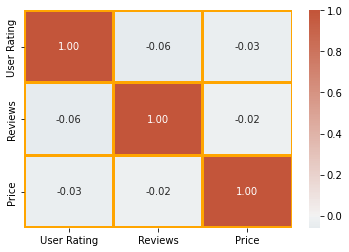

In [80]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df_without_yr.corr(),cmap=cmap, center=0,annot=True, fmt='0.2f',linewidth=2, linecolor='orange' )

In [81]:
q = "select Genre, count(*) as Count from df_without_yr group by Genre"
df_genre = sqldf(q, globals())

In [82]:
fig = px.pie(df_genre, values='Count', names='Genre', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [83]:
px.box(data_frame = df_without_yr, y ='Price', template = 'plotly_dark')

In [84]:
px.box(data_frame = df_without_yr, y ="User Rating", template = 'plotly_dark')

In [85]:
px.box(data_frame = df_without_yr, y ='Reviews', template = 'plotly_dark')

In [86]:
px.box(data_frame = df_without_yr, x ='Genre' ,y ="User Rating", template = 'plotly_dark')

In [87]:
px.box(data_frame = df_without_yr, x ='Genre' ,y ="Reviews", template = 'plotly_dark')

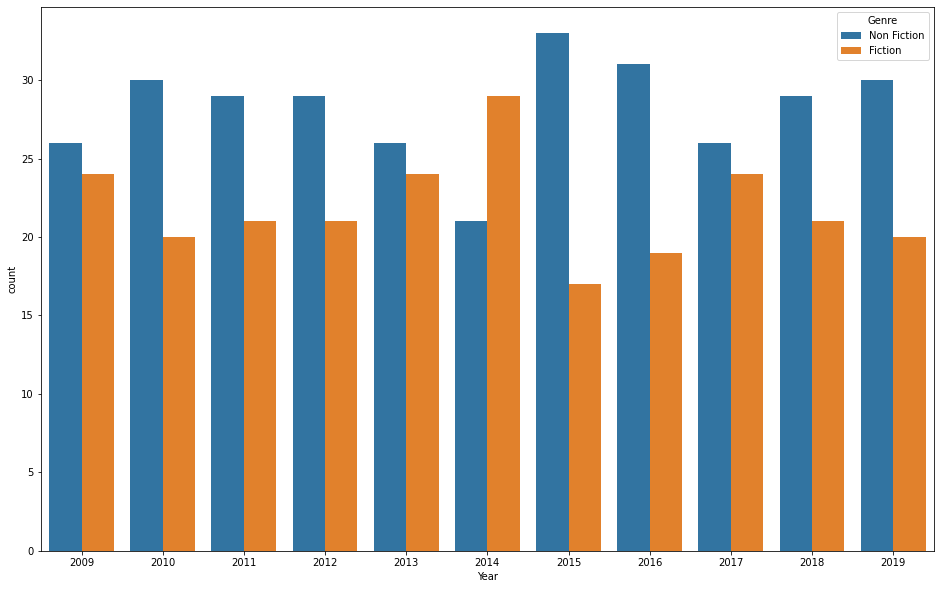

In [88]:
plt.figure(figsize = (16, 10))
sns.countplot(data=df, x='Year', hue='Genre')
plt.show()

In [89]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules For Life: An Antidote To Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [90]:
df_fiction = df[df['Genre'] == 'Fiction']
df_nonfiction = df[df['Genre'] == 'Non Fiction']

In [91]:
df_fiction.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
5,A Dance With Dragons (A Song Of Ice And Fire),George R.R. Martin,4.4,12643,11,2011,Fiction
6,A Game Of Thrones / A Clash Of Kings / A Storm...,George R.R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman In Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction


In [92]:
q1 = "select Year, count(*) as Count from df_fiction group by Year"
q2 = "select Year, count(*) as Count from df_nonfiction group by Year"
df_1 = sqldf(q1, globals())
df_2 = sqldf(q2, globals())

In [93]:
df_1.head()

,Year,Count
0,2009,24
1,2010,20
2,2011,21
3,2012,21
4,2013,24


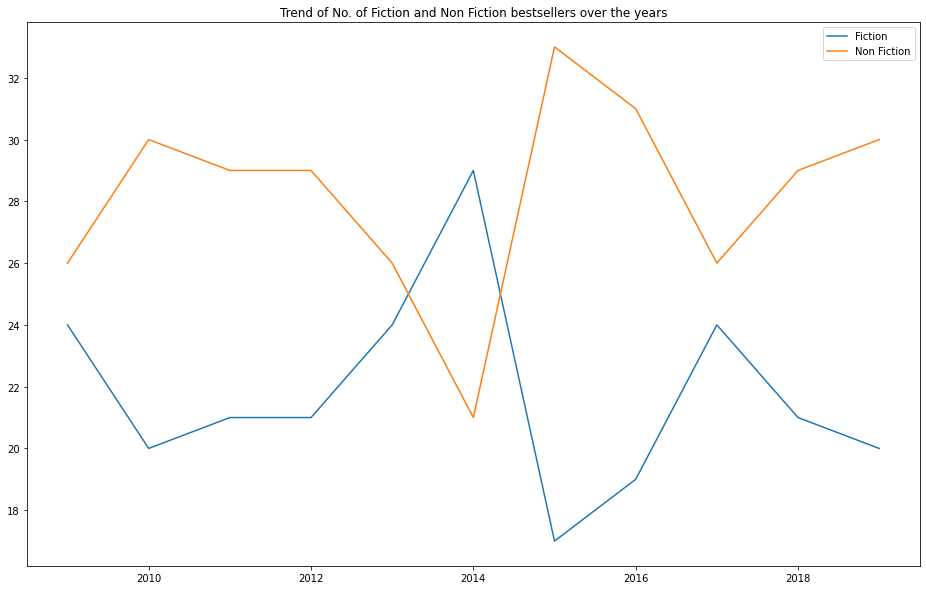

In [94]:
plt.figure(figsize = (16, 10))
plt.plot(df_1['Year'], df_1['Count'], label="Fiction")
plt.plot(df_2['Year'], df_2['Count'], label="Non Fiction")
plt.legend()
plt.title("Trend of No. of Fiction and Non Fiction bestsellers over the years")
plt.show()

In [95]:
q1 = "select Year, AVG([User Rating]) as [Avg Rating] from df_fiction group by Year"
q2 = "select Year, AVG([User Rating]) as [Avg Rating] from df_nonfiction group by Year"
df_1 = sqldf(q1, globals())
df_2 = sqldf(q2, globals())

In [96]:
df_1.head()

,Year,Avg Rating
0,2009,4.591667
1,2010,4.615000
2,2011,4.619048
3,2012,4.495238
4,2013,4.545833


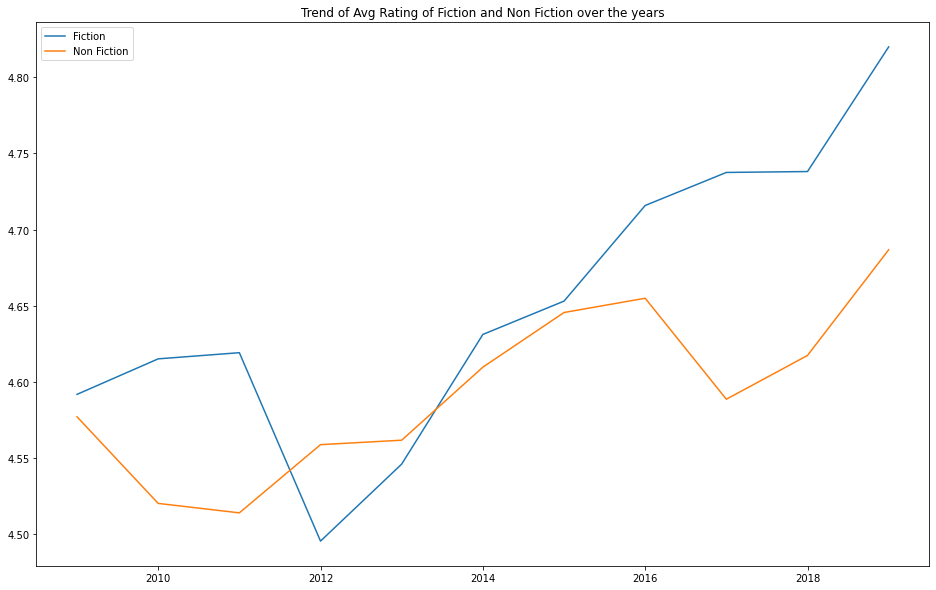

In [97]:
plt.figure(figsize = (16, 10))
plt.plot(df_1['Year'], df_1["Avg Rating"], label="Fiction")
plt.plot(df_2['Year'], df_2["Avg Rating"], label="Non Fiction")
plt.legend()
plt.title("Trend of Avg Rating of Fiction and Non Fiction over the years")
plt.show()

In [98]:
print(f'Overall Avg rating Fiction : {df_fiction["User Rating"].mean()}')
print(f'Overall Avg rating Non-Fiction : {df_nonfiction["User Rating"].mean()}')

Overall Avg rating Fiction : 4.6483333333333325
Overall Avg rating Non-Fiction : 4.59516129032258
